In [3]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

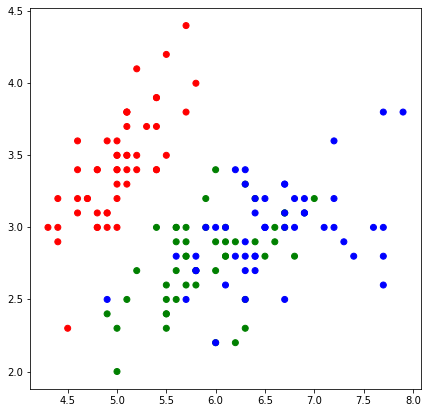

In [6]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [7]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [8]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [19]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [37]:
def get_graph(X_train, y_train, k, w : int = 0):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_W(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, w)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

## Домашнее задание 

Задание 1: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

Задание 2: К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [34]:
def knn_W(x_train, y_train, x_test, k, w : int = 0):
    
#     w = 0 - стандартный KNN
#     W = 1 - взвешенное голосование по номеру позиции
#     w = 2 - взвешенное голосование по расстоянию
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        if w == 0:
            
            for d in sorted(test_distances)[0:k]:
                classes[d[1]] += 1

            answers.append(sorted(classes, key=classes.get)[-1])

        elif w == 1:
            q = 1
            for d in sorted(test_distances)[0:k]:
                z = 1 + 1/q
                q += 1
                classes[d[1]] += z
            answers.append(sorted(classes, key=classes.get)[-1])

        elif w == 2:
            a = 0.5
            for d in sorted(test_distances)[0:k]:
                z = 1 + 1/(d[0] + a)**2
                classes[d[1]] += z
            answers.append(sorted(classes, key=classes.get)[-1])
 
        
            
    return answers

In [45]:
k = 3

y_pred = knn_W(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


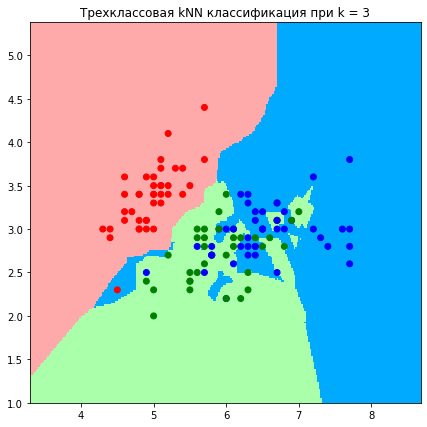

In [46]:
get_graph(X_train, y_train, k)

In [47]:
k = 3
w = 1
y_pred = knn_W(X_train, y_train, X_test, k, w)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


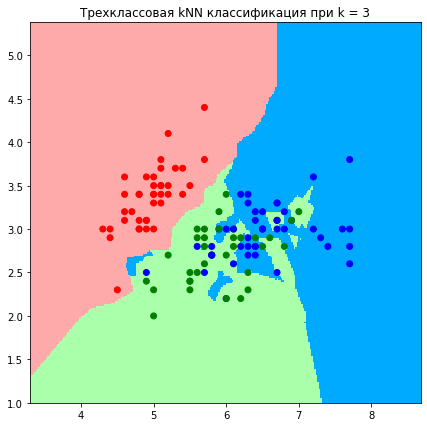

In [48]:
get_graph(X_train, y_train, k, w)

In [49]:
k = 3
w = 2
y_pred = knn_W(X_train, y_train, X_test, k, w)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


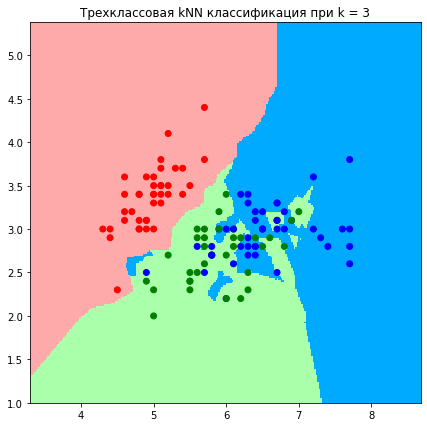

In [50]:
get_graph(X_train, y_train, k, w)

Метрика качества идэнтичная, что означает что эти два подхода равнозначны(по крайней мере на этом датасэте). Гиперплоскости между ними тоже идэнтичные, но становится чуть проще чем базовый KNN(хотя на метрику это не влияет). 

Задание 3 : Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы.

In [73]:
def opt_K(max_k, W):
    accur = []
    for i in range(1,max_k+1):
        k = i
        w = W
        y_pred = knn_W(X_train, y_train, X_test, k, w)
        accur.append(accuracy(y_pred, y_test))
    plt.xlabel('K')
    plt.ylabel('accuracy')
    plt.xlim(0, max_k+1)
    plt.plot(list(range(1,max_k+1)), accur,label='num')
    plt.legend(loc='upper right')
    print(max(accur))

0.8666666666666667


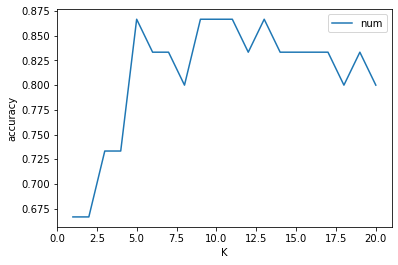

In [74]:
opt_K(20,1)

0.8666666666666667


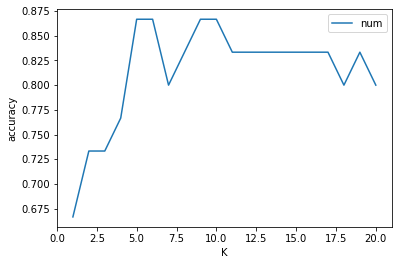

In [75]:
opt_K(20,2)

Наилучший результат достигается при K=5.

In [76]:
k = 5
w = 1
y_pred = knn_W(X_train, y_train, X_test, k, w)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.867


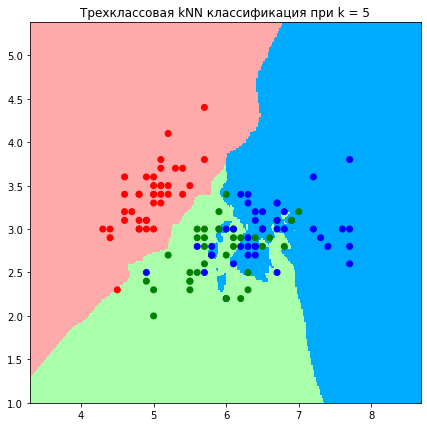

In [77]:
get_graph(X_train, y_train, k, w)